In [1]:
import numpy as np
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt

from time import time

from common import *
from generate import *
from filter_kruskal import *

In [2]:
#common.run(args="--help")
run(args="--help")

Allowed options:
  -h [ --help ]                      produce help message
  -m [ --mst-kernel ] arg (=1)       Kernel used calculating MST. 0 = regular 
                                     kruskal, 1 = filter-kruskal
  -s [ --sort-kernel ] arg (=1)      Kernel used for sort() [int]
  -p [ --partition-kernel ] arg (=1) Kernel used for partition() [int]
  --pinned-memory                    use pinned memory (OFF by default)
  -f [ --filter-kernel ] arg (=0)    Kernel used for filter() [int]
  -c [ --compress-kernel ] arg (=1)  Kernel used for compress() [int]
  -r [ --recusion-depth ] arg (=32)  Kernel used for compress() [int]
  -n [ --repetitions ] arg (=1)      Number of times the MST calculation is 
                                     repeated [int]
  -i [ --inputfile ] arg             input file containing graph data. Filepath
                                     must be relative to Ex2/
  -t [ --ouputfile_timings ] arg     Output file for timings. Filepath must be 
             

In [3]:
args = f"--inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 1"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 1
159705 Edges loaded

Benchmark results:
Initialize	µ=0.169429s	sigma=0s	median=0.169429s	total=0.169429	num_calls=1
Kruskal()	µ=0.00698745s	sigma=0s	median=0.00698745s	total=0.00698745	num_calls=1
filter()	µ=0.000785975s	sigma=0.000296475s	median=0.000602693s	total=0.00707377	num_calls=9
grow MST	µ=0.000392789s	sigma=0s	median=0.000392789s	total=0.000392789	num_calls=1
partition()	µ=0.000964772s	sigma=0.000184086s	median=0.000841351s	total=0.00868295	num_calls=9
sort()	µ=0.00656127s	sigma=0s	median=0.00656127s	total=0.00656127	num_calls=1
total	µ=0.192212s	sigma=0s	median=0.192212s	total=0.192212	num_calls=1


,tag,average,std_dev,median,total,num_calls
0,Initialize,0.169429,0.000000,0.169429,0.169429,1
1,Kruskal(),0.006987,0.000000,0.006987,0.006987,1
2,filter(),0.000786,0.000296,0.000603,0.007074,9
3,grow MST,0.000393,0.000000,0.000393,0.000393,1
4,partition(),0.000965,0.000184,0.000841,0.008683,9
5,sort(),0.006561,0.000000,0.006561,0.006561,1
6,total,0.192212,0.000000,0.192212,0.192212,1


In [4]:
run(args="--help")

Allowed options:
  -h [ --help ]                      produce help message
  -m [ --mst-kernel ] arg (=1)       Kernel used calculating MST. 0 = regular 
                                     kruskal, 1 = filter-kruskal
  -s [ --sort-kernel ] arg (=1)      Kernel used for sort() [int]
  -p [ --partition-kernel ] arg (=1) Kernel used for partition() [int]
  --pinned-memory                    use pinned memory (OFF by default)
  -f [ --filter-kernel ] arg (=0)    Kernel used for filter() [int]
  -c [ --compress-kernel ] arg (=1)  Kernel used for compress() [int]
  -r [ --recusion-depth ] arg (=32)  Kernel used for compress() [int]
  -n [ --repetitions ] arg (=1)      Number of times the MST calculation is 
                                     repeated [int]
  -i [ --inputfile ] arg             input file containing graph data. Filepath
                                     must be relative to Ex2/
  -t [ --ouputfile_timings ] arg     Output file for timings. Filepath must be 
             

In [41]:
whatever_runs = [{'n_nodes': 200, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 400, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 800, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 1600, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 3200, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 6400, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 200, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 400, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 800, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 1600, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'}
                ]

n_nodes_list_d10 = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
n_nodes_list_d50 = [50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]
n_nodes_list_d90 = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400]

def get_run_list(n_nodes_list, density, prefix, flags, reps_standard=10, reps_last=3):
    run_list = []
    for n_nodes in n_nodes_list[:-1]:
        run_list.append({'n_nodes': n_nodes, 'density': density, 'prefix': prefix, 'flags': flags + f' -n {reps_standard}'})
    # fewer repetitions on the biggest graph
    run_list.append({'n_nodes': n_nodes_list[-1], 'density': density, 'prefix': prefix, 'flags': flags + f' -n {reps_last}'})
    return run_list


#define SORT_KERNEL_GPU_BUBBLE_MULT 0
#define SORT_KERNEL_MERGE_SORT 1
#define SORT_KERNEL_THRUST 2
#define SORT_KERNEL_RADIX 3

#define PARTITION_KERNEL_CPU_NAIVE 0
#define PARTITION_KERNEL_GPU 1
#define PARTITION_KERNEL_STREAMS 2
#define PARTITION_KERNEL_THRUST 3

#define FILTER_KERNEL_CPU_NAIVE 0
#define FILTER_KERNEL_GPU 1
#define FILTER_KERNEL_THRUST 2

#define COMPRESS_NOTHING 0
#define COMPRESS_KERNEL_CPU_NAIVE 1
#define COMPRESS_KERNEL_GPU 2
#define COMPRESS_KERNEL_GPU_LIMITED 3

"""
-m ... 0 : regular kruskal, 1 : filter kruskal
-s ... 2 : thrust sort, 3 : radix sort
-p ... 0 : partition cpu, 1 : partition gpu, 2 : partition thrust
-f ... 0 : filter cpu, 1 : filter gpu, 2 : filter thrust

--pinned-memory 
"""

# compare thrust sort with radix sort
regK_thrustsort_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'regK_thrustsort', '-m 0 -s 2')
regK_thrustsort_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'regK_thrustsort', '-m 0 -s 2')
regK_thrustsort_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'regK_thrustsort', '-m 0 -s 2')

regK_radix_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'regK_radix', '-m 0 -s 3')
regK_radix_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'regK_radix', '-m 0 -s 3')
regK_radix_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'regK_radix', '-m 0 -s 3')


# compare all thrust with our kernels (filter and partition on cpu)
filK_all_thrust_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_all_thrust', '-s 2 -p 3 -f 2')
filK_all_thrust_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_all_thrust', '-s 2 -p 3 -f 2')
filK_all_thrust_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_all_thrust', '-s 2 -p 3 -f 2')

filK_all_custom_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_all_custom', '-m 1 -f 0 -p 0 -s 3')
filK_all_custom_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_all_custom', '-m 1 -f 0 -p 0 -s 3')
filK_all_custom_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_all_custom', '-m 1 -f 0 -p 0 -s 3')

filK_all_gpu_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_all_gpu', '-m 1 -f 1 -p 1 -s 3')
filK_all_gpu_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_all_gpu', '-m 1 -f 1 -p 1 -s 3')
filK_all_gpu_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_all_gpu', '-m 1 -f 1 -p 1 -s 3')

filK_part_gpu_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_part_gpu', '-m 1 -f 0 -p 1 -s 3')
filK_part_gpu_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_part_gpu', '-m 1 -f 0 -p 1 -s 3')
filK_part_gpu_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_part_gpu', '-m 1 -f 0 -p 1 -s 3')

filK_filter_gpu_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_filter_gpu', '-m 1 -f 1 -p 0 -s 3')
filK_filter_gpu_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_filter_gpu', '-m 1 -f 1 -p 0 -s 3')
filK_filter_gpu_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_filter_gpu', '-m 1 -f 1 -p 0 -s 3')

filK_filter_nr_gpu_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_filter_nr_gpu', '-m 1 -f 1 -p 0 -s 2')
filK_filter_nr_gpu_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_filter_nr_gpu', '-m 1 -f 1 -p 0 -s 2')
filK_filter_nr_gpu_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_filter_nr_gpu', '-m 1 -f 1 -p 0 -s 2')

filK_filter_r1000_gpu_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_filter_nr_gpu', '-m 1 -f 1 -p 0 -s 3 -r 1000')
filK_filter_r1000_gpu_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_filter_nr_gpu', '-m 1 -f 1 -p 0 -s 3 -r 1000')
filK_filter_r1000_gpu_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_filter_nr_gpu', '-m 1 -f 1 -p 0 -s 3 -r 1000')


# these dont work well...
# ----------------------------
# just use cpu filter
# compare filter methods (sort: radix, partition: gpu, filter: varies, compress: cpu)
filK_gpu_filter_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'gpu_filter', '-m 1 -f 1 -p 0 -s 3') # this does not work - looks like segfault at size 400+ 
filK_cpu_filter_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'cpu_filter', '-m 1 -f 0 -p 0 -s 3') 


# just use cpu partition
# compare partition methods (sort: radix, partition: varies, filter: cpu, compress: cpu)
filK_gpu_partition_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'gpu_partition', '-m 1 -f 0 -p 0 -s 3') # this does not finish for some reason didnt go beyond 6400
filK_cpu_partition_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'gpu_partition', '-m 1 -f 0 -p 1 -s 3')




In [6]:
do_benchmark_runs(filK_all_custom_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_custom_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 1 -f 0 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_custom_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 1 -f 0 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_custom_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 1 -f 0 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_custom_800_10pct.csv --inputfile benchmar

In [7]:
do_benchmark_runs(filK_all_custom_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_custom_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 1 -f 0 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_custom_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 1 -f 0 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_custom_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 1 -f 0 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_custom_400_50pct.csv --inputfile benchmark_

In [8]:
do_benchmark_runs(filK_all_custom_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_custom_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 1 -f 0 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_custom_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 1 -f 0 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_custom_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 1 -f 0 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_custom_200_90pct.csv --inputfile benchmark_da

In [9]:
do_benchmark_runs(filK_all_thrust_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_800_10pct.csv --inputfile benchmark_data/barabasi

In [10]:
do_benchmark_runs(filK_all_thrust_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_400_50pct.csv --inputfile benchmark_data/barabasi_4

In [11]:
do_benchmark_runs(filK_all_thrust_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_200_90pct.csv --inputfile benchmark_data/barabasi_200

In [12]:
do_benchmark_runs(regK_thrustsort_runs_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_800_10pct.csv --inputfile benchmark_data/barabasi_800_10pct.csv 

In [13]:
do_benchmark_runs(regK_thrustsort_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_400_50pct.csv --inputfile benchmark_data/barabasi_400_50pct.csv -m

In [14]:
do_benchmark_runs(regK_thrustsort_runs_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_200_90pct.csv --inputfile benchmark_data/barabasi_200_90pct.csv -m 0

In [15]:
do_benchmark_runs(regK_radix_runs_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_800_10pct.csv --inputfile benchmark_data/barabasi_800_10pct.csv -m 0 -s 3 -n 10
Runn

In [16]:
do_benchmark_runs(regK_radix_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_400_50pct.csv --inputfile benchmark_data/barabasi_400_50pct.csv -m 0 -s 3 -n 10
Runnin

In [17]:
do_benchmark_runs(regK_radix_runs_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_200_90pct.csv --inputfile benchmark_data/barabasi_200_90pct.csv -m 0 -s 3 -n 10
Running 

In [26]:
do_benchmark_runs(filK_all_gpu_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_gpu_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_gpu_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_gpu_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_gpu_800_10pct.csv --inputfile benchmark_data/barab

CalledProcessError: Command '['/home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2', '--ouputfile_timings', '/home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_gpu_1600_10pct.csv', '--inputfile', 'benchmark_data/barabasi_1600_10pct.csv', '-m', '1', '-f', '1', '-p', '1', '-s', '3', '-n', '10']' died with <Signals.SIGSEGV: 11>.

In [29]:
do_benchmark_runs(filK_part_gpu_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_part_gpu_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 1 -f 0 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_part_gpu_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 1 -f 0 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_part_gpu_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 1 -f 0 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_part_gpu_800_10pct.csv --inputfile benchmark_data/b

In [30]:
do_benchmark_runs(filK_part_gpu_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_part_gpu_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 1 -f 0 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_part_gpu_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 1 -f 0 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_part_gpu_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 1 -f 0 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_part_gpu_400_50pct.csv --inputfile benchmark_data/bar

In [31]:
do_benchmark_runs(filK_part_gpu_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_part_gpu_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 1 -f 0 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_part_gpu_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 1 -f 0 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_part_gpu_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 1 -f 0 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_part_gpu_200_90pct.csv --inputfile benchmark_data/barab

In [40]:
do_benchmark_runs(filK_filter_gpu_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_filter_gpu_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 1 -f 1 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_filter_gpu_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 1 -f 1 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_filter_gpu_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 1 -f 1 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_filter_gpu_800_10pct.csv --inputfile benchmar

CalledProcessError: Command '['/home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2', '--ouputfile_timings', '/home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_filter_gpu_1600_10pct.csv', '--inputfile', 'benchmark_data/barabasi_1600_10pct.csv', '-m', '1', '-f', '1', '-p', '0', '-s', '3', '-n', '10']' died with <Signals.SIGSEGV: 11>.

In [42]:
do_benchmark_runs(filK_filter_nr_gpu_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_filter_nr_gpu_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 1 -f 1 -p 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_filter_nr_gpu_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 1 -f 1 -p 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_filter_nr_gpu_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 1 -f 1 -p 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_filter_nr_gpu_800_10pct.csv --inputf

CalledProcessError: Command '['/home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2', '--ouputfile_timings', '/home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_filter_nr_gpu_1600_10pct.csv', '--inputfile', 'benchmark_data/barabasi_1600_10pct.csv', '-m', '1', '-f', '1', '-p', '0', '-s', '2', '-n', '10']' died with <Signals.SIGSEGV: 11>.

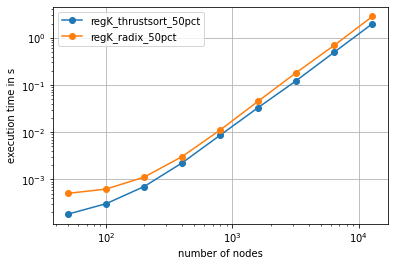

In [32]:
plot_lines(regK_thrustsort_runs_d50 + regK_radix_runs_d50)
plt.savefig(common.OUT_DIR / "radix_vs_thrustsort_d50.png", dpi=200)


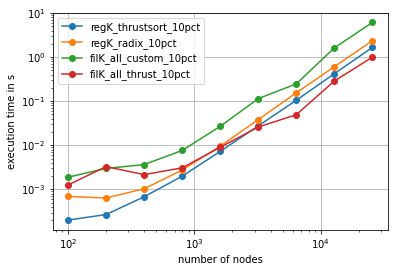

In [33]:
plot_lines(regK_thrustsort_runs_d10 + regK_radix_runs_d10 + filK_all_custom_d10 + filK_all_thrust_d10)
#plt.savefig(common.OUT_DIR / "all_four_d10.png", dpi=200)

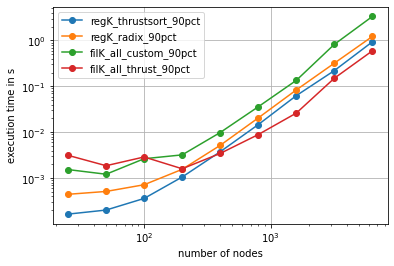

In [34]:
plot_lines(regK_thrustsort_runs_d90 + regK_radix_runs_d90 + filK_all_custom_d90 + filK_all_thrust_d90)
#plt.savefig(common.OUT_DIR / "all_four_d90.png", dpi=200)

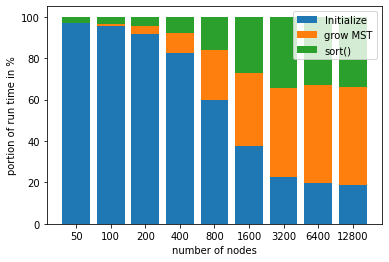

In [35]:
stacked_bars(regK_radix_runs_d50, regular_kruskal=True)
#plt.savefig(common.OUT_DIR / "bars_regK_radix_d50.png", dpi=200)


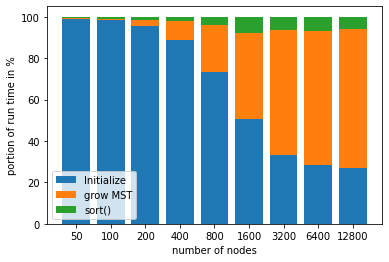

In [36]:
stacked_bars(regK_thrustsort_runs_d50, regular_kruskal=True)
#plt.savefig(common.OUT_DIR / "bars_regK_thrustsort_d50.png", dpi=200)


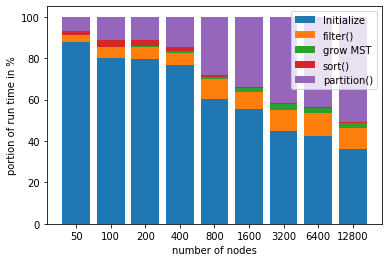

In [37]:
stacked_bars(filK_all_thrust_d50)
#plt.savefig(common.OUT_DIR / "bars_filK_all_thrust_d50.png", dpi=200)


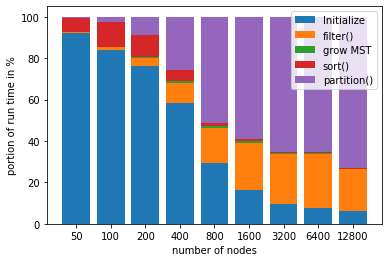

In [38]:
stacked_bars(filK_all_custom_d50)
#plt.savefig(common.OUT_DIR / "bars_filK_all_custom_d50.png", dpi=200)

[50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]


dict_keys(['Initialize', 'filter()', 'grow MST', 'sort()', 'partition()'])

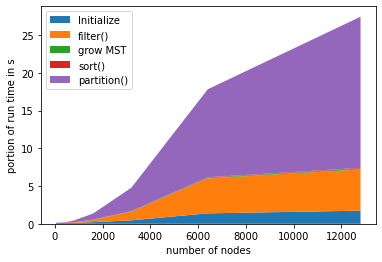

In [39]:

labels, stack = collect_for_stack(filK_all_custom_d50)
print(labels)
stack
plt.stackplot(labels,stack['Initialize'],stack['filter()'], stack['grow MST'], stack['sort()'], stack['partition()'], labels=stack.keys())
plt.legend(loc='upper left')
plt.xlabel('number of nodes')
plt.ylabel('portion of run time in s')
stack.keys()